## **TASK-6 Prediction using Decision Tree Algorithm**

Task: Create the Decision Tree classifier and visualize it graphically.

**AUTHOR- Luke Chugh** 


**Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import graphviz

# Importing libraries 
import sklearn.datasets as datasets
import pandas as pd


# Loading the iris dataset
iris=datasets.load_iris()

from google.colab import files
uploaded = files.upload()

Saving Iris (1).csv to Iris (1) (1).csv


In [ ]:
df=pd.read_csv("Iris (1).csv")
df.shape
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
x=df.values

label=iris.target
print(label)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


**Splitting data into train and test data**

In [ ]:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, label, test_size=0.2,shuffle=True)

**Importing & modeling the decision tree classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion="entropy", max_depth = 10)   #max depth is the height set for decision tree formed
dtree.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_pred=dtree.predict(x_test)
print(f'the accuracy of training set is {dtree.score(x_train,y_train)}')
print(f'the accuracy of test set is {dtree.score(x_test,y_test)}')

the accuracy of training set is 1.0
the accuracy of test set is 0.9333333333333333


**Visualization**

In [ ]:

from six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
import numpy as np
%matplotlib inline

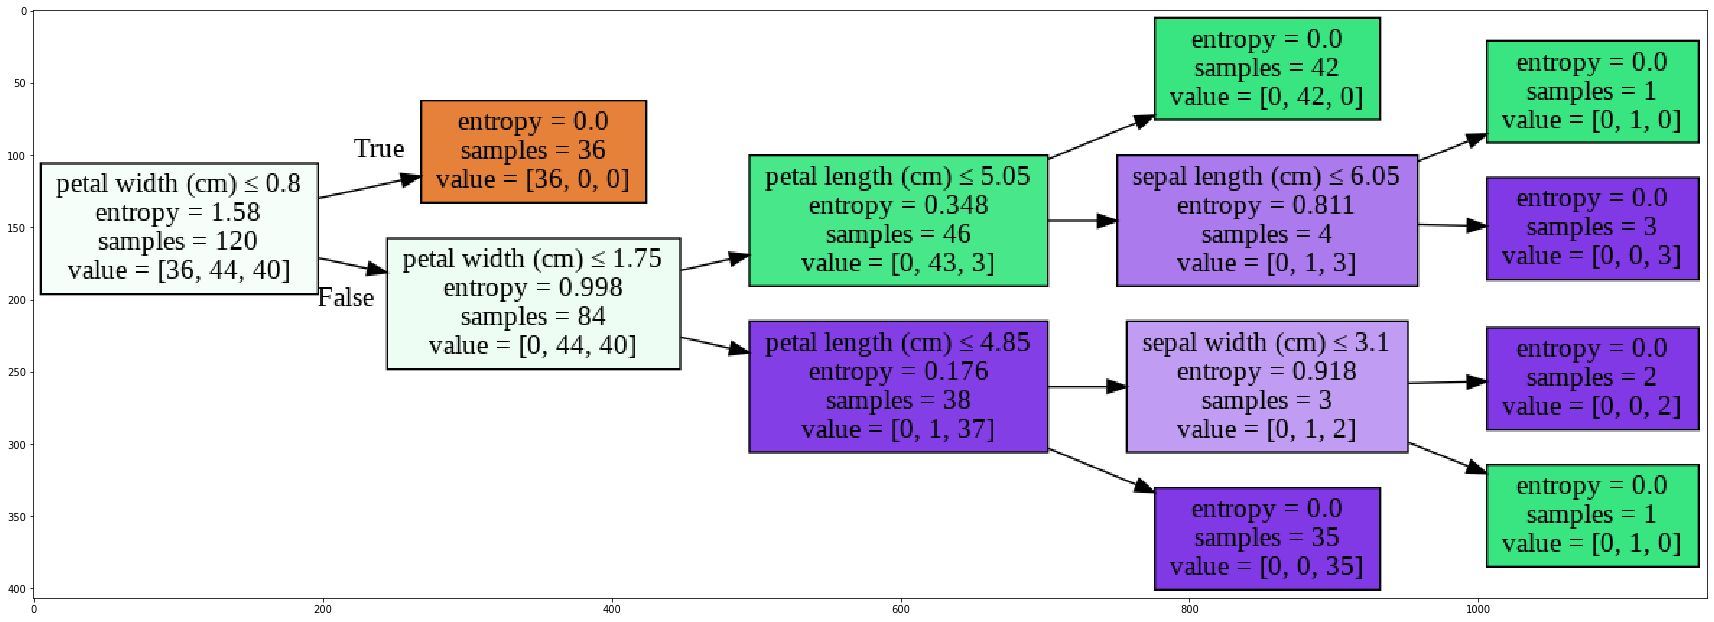

In [ ]:
dot_data = StringIO()
filename = "drugtree.png"
featureNames = df.columns[0:4]
out=tree.export_graphviz(dtree,feature_names=iris.feature_names, out_file=dot_data, filled=True,  special_characters=True,rotate=True,max_depth=10)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(30, 50))
plt.imshow(img,interpolation='nearest')